In [73]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import utils
np.random.seed(0)

In [2]:
data = pd.read_csv('Admission_Predict.csv', index_col=0)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [3]:
data['Admitted'] = data['Chance of Admit'] >= 0.75

In [4]:
data = data.drop(['Chance of Admit'], axis=1)

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,True
397,325,107,3,3.0,3.5,9.11,1,True
398,330,116,4,5.0,4.5,9.45,1,True


In [6]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

In [7]:
features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [8]:
labels

Serial No.
1       True
2       True
3      False
4       True
5      False
       ...  
396     True
397     True
398     True
399    False
400     True
Name: Admitted, Length: 400, dtype: bool

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(features, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [12]:
dt.score(features, labels)

1.0

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


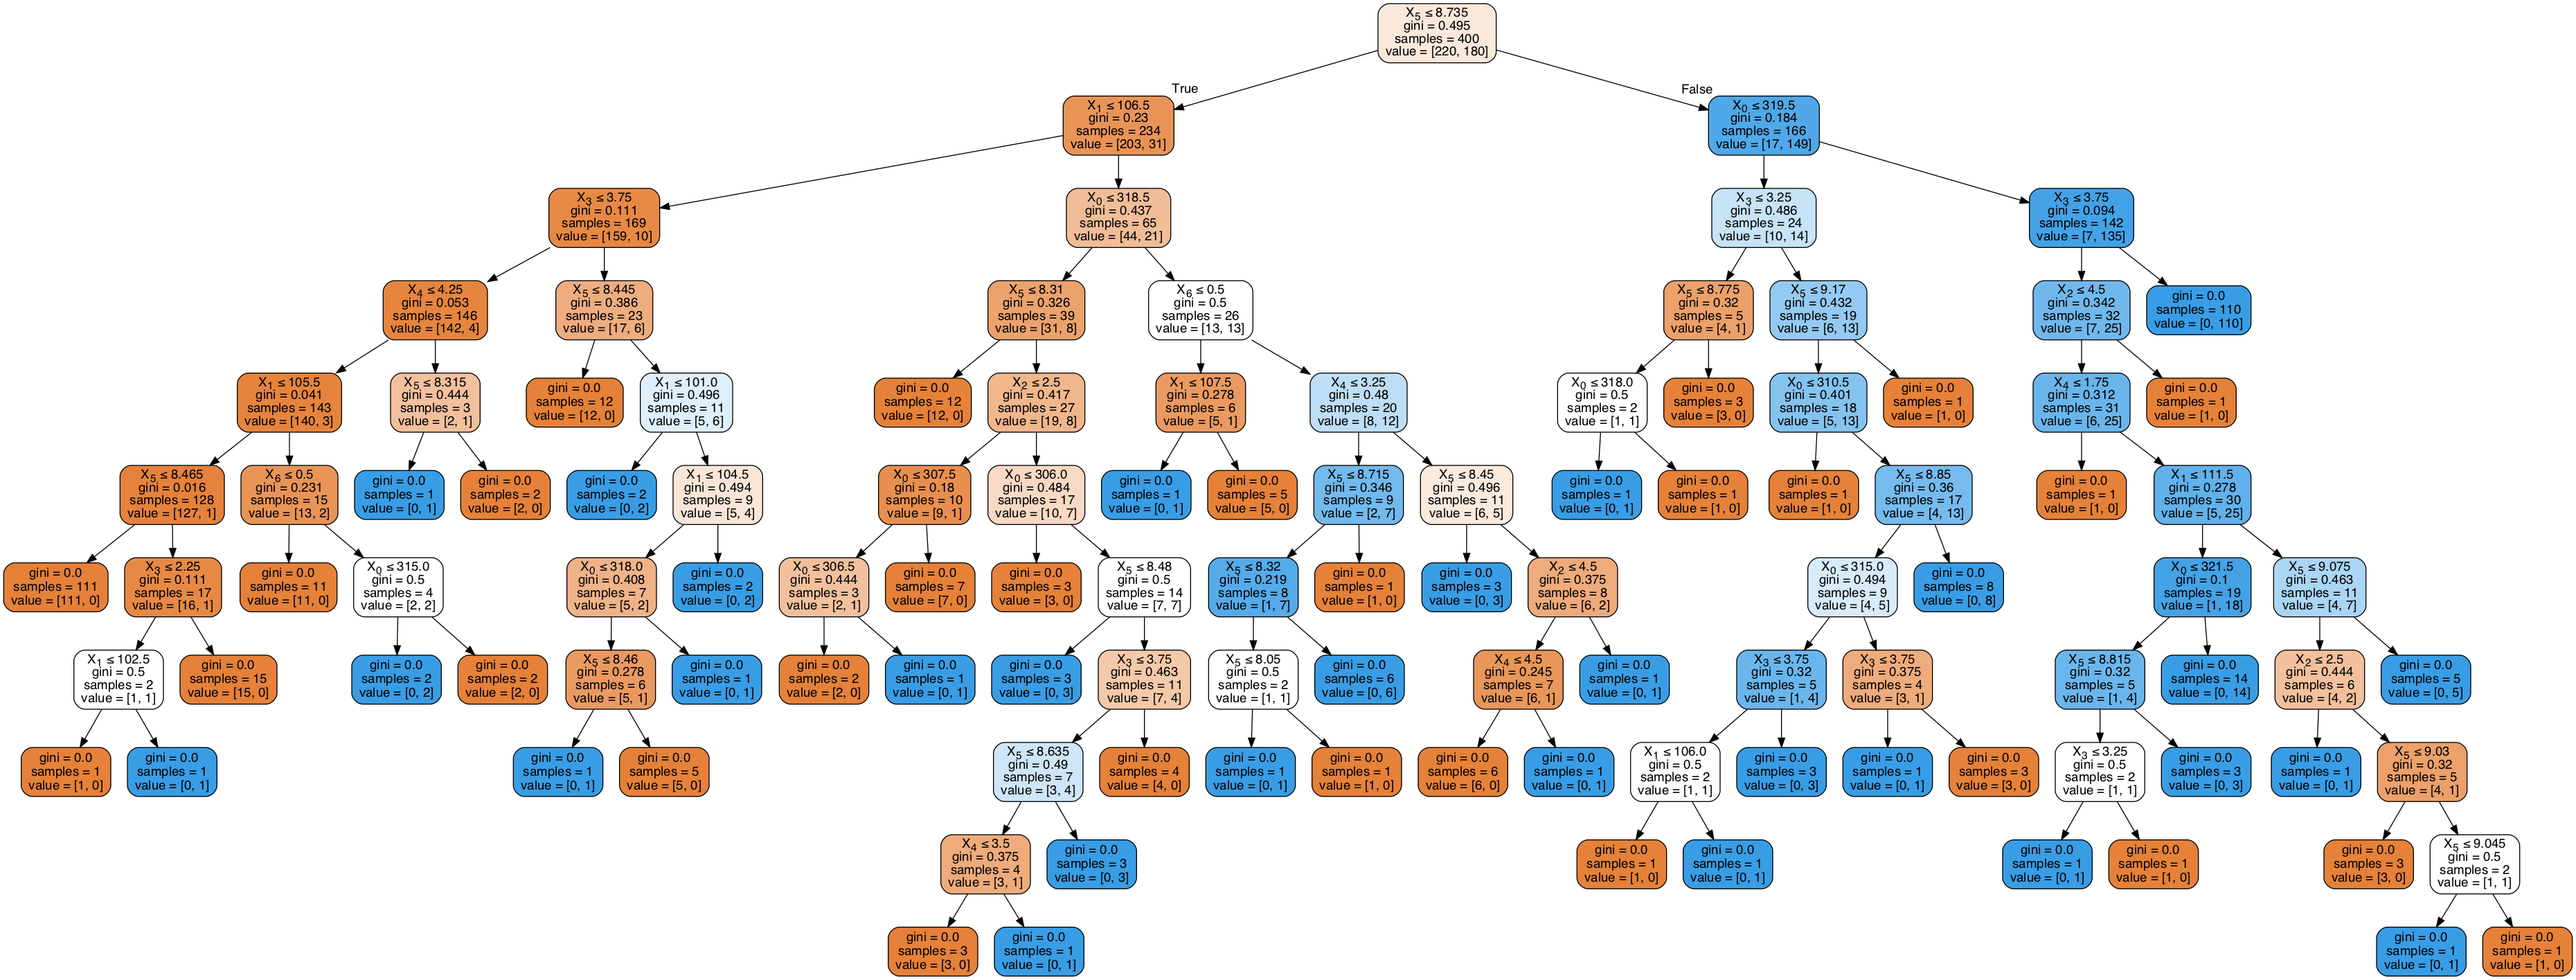

In [13]:
utils.display_tree(dt)

In [75]:
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [76]:
dt_smaller.fit(features, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
dt_smaller.score(features, labels)

0.885

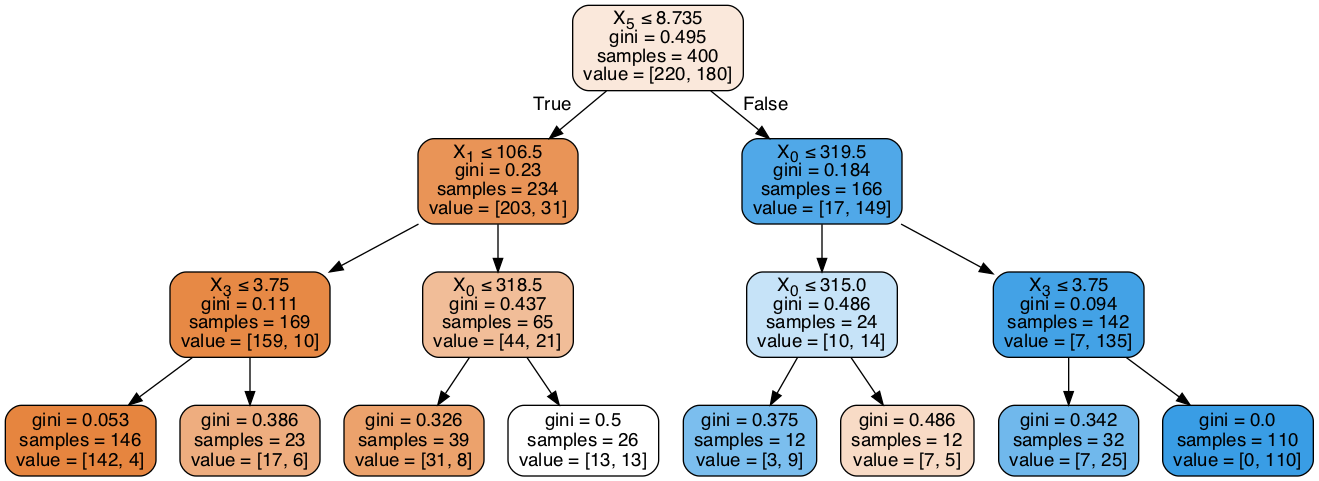

In [78]:
utils.display_tree(dt_smaller)

In [91]:
dt_smaller.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.9,
                     0]])

array([ True])

# Only two features

In [18]:
#exams = data[['GRE Score', 'CGPA']]
exams = data[['GRE Score', 'TOEFL Score']]
exams

,GRE Score,TOEFL Score
Serial No.,,
1,337,118
2,324,107
3,316,104
4,322,110
5,314,103
...,...,...
396,324,110
397,325,107
398,330,116


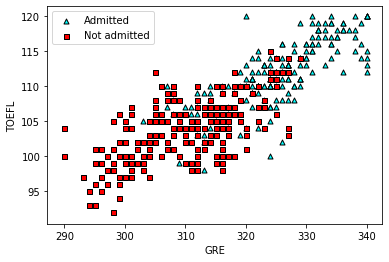

In [19]:
utils.plot_points(exams, labels)

### Fitting a tree of depth 2

In [25]:
#dt_exams = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)
dt_exams = DecisionTreeClassifier(max_depth=2)

In [26]:
dt_exams.fit(exams, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


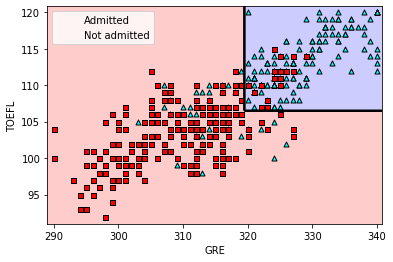

In [27]:
utils.plot_model(exams, labels, dt_exams)

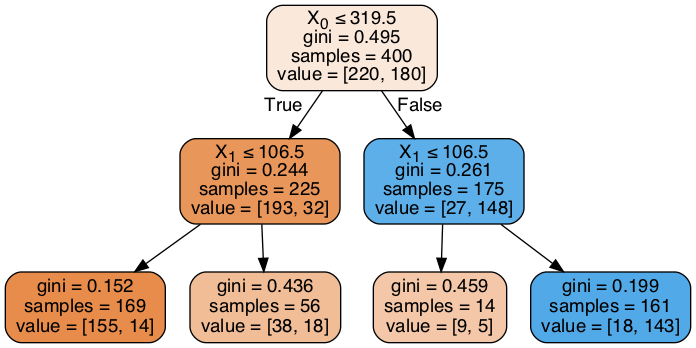

In [28]:
utils.display_tree(dt_exams)

### Fitting a tree of depth 1

In [43]:
simpler_dt_exams = DecisionTreeClassifier(max_depth=1)
simpler_dt_exams.fit(exams, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


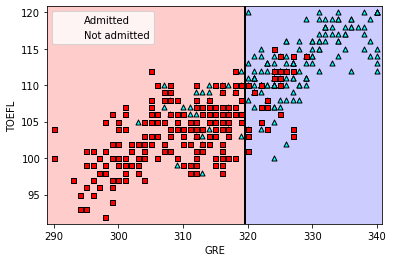

In [44]:
utils.plot_model(exams, labels, simpler_dt_exams)

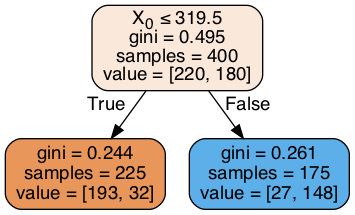

In [45]:
utils.display_tree(simpler_dt_exams)

### Fitting a tree of unbounded depth

In [69]:
crazy_dt_exams = DecisionTreeClassifier()
crazy_dt_exams.fit(exams, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


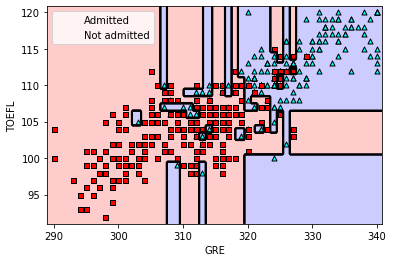

In [70]:
utils.plot_model(exams, labels, crazy_dt_exams)

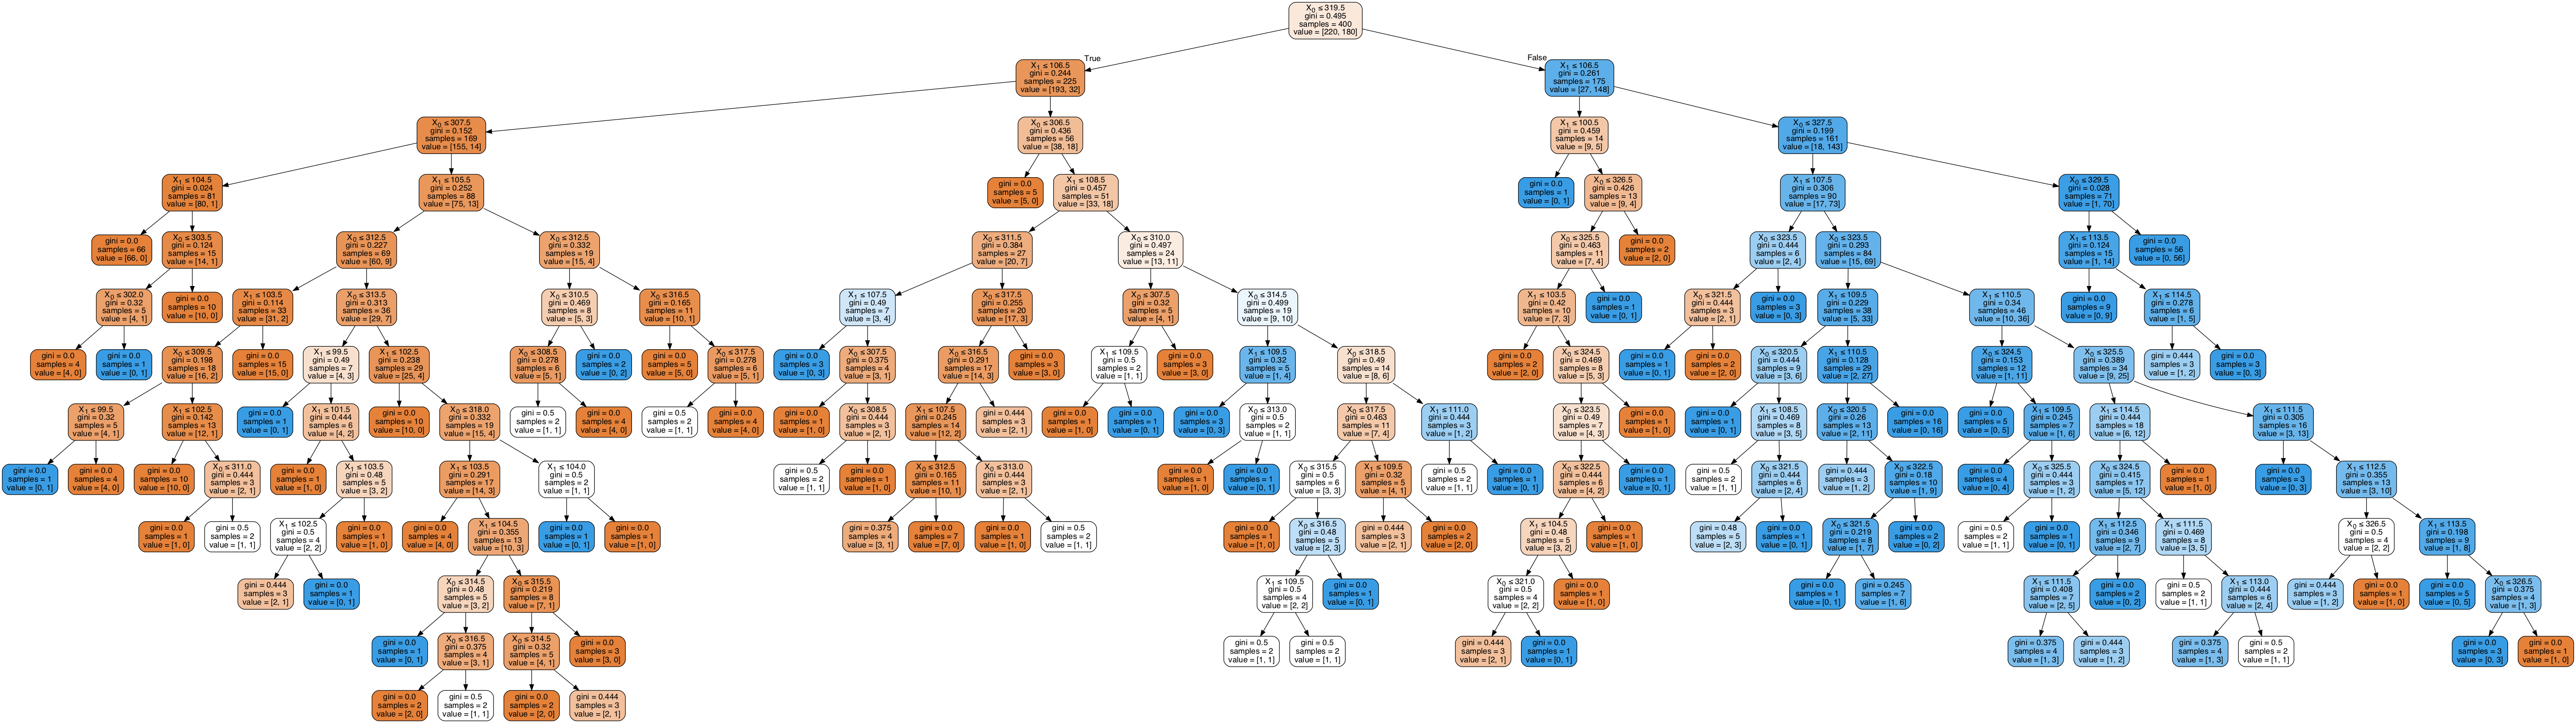

In [72]:
utils.display_tree(crazy_dt_exams)